In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# cargar dataset
academic_performance = pd.read_csv('enhanced_student_habits_performance_dataset.csv')

scaler_std = StandardScaler()
academic_performance['attendance_percentage_std'] = scaler_std.fit_transform(academic_performance[['attendance_percentage']])

academic_performance['study_hours_per_screen_time_hours_ratio'] = academic_performance['study_hours_per_day'] / academic_performance['screen_time']
academic_performance['study_hours_per_motivation_level_ratio'] = academic_performance['study_hours_per_day'] / academic_performance['motivation_level']

# variables predictoras
X = academic_performance[['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage_std', 'sleep_hours',
                        'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'stress_level', 'social_activity', 'screen_time',
                        'motivation_level', 'exam_anxiety_score', 'time_management_score', 'study_hours_per_screen_time_hours_ratio',
                        'study_hours_per_motivation_level_ratio']]
y = academic_performance['exam_score']

# division estandar: 80% entrenamiento / 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# entrenar el modelo de regresion lineal
from sklearn.linear_model import LinearRegression # implementa la formula de la linea recta

# instanciar y entrenar modelo
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train) # calcula coefecientes para minimizar el error cuadratico medio

print('Modelo entrenado exitosamente')

Modelo entrenado exitosamente


In [34]:
# mostrar coeficientes
print(f'Intercepto: {modelo_rl.intercept_}') # representa el valor que predice el modelo cuando todas las variables independientes son 0s
print(f'Coeficientes: {modelo_rl.coef_}') # indica cuanto cambia la prediccion cuando una de las variables aumenta en una unidad

# interpretacion amigable
for idx, col_name in enumerate(X.columns):
  print(f'Si aumentamos 1 unidad en "{col_name}", el puntaje del examen cambia en promedio {modelo_rl.coef_[idx]:.2f}')

Intercepto: 4.226258799613348
Coeficientes: [-1.56316784e-02  3.72400428e-02  4.93082509e-02  1.50026300e-02
  1.68056067e-03 -2.52771313e-03  3.92300379e-03  2.33565703e+01
  2.29169919e-03 -1.33249366e-03 -1.49584840e-02  2.86390385e-02
  4.84416667e-02 -5.10595466e-03  4.29918466e-01  2.65269497e-02]
Si aumentamos 1 unidad en "study_hours_per_day", el puntaje del examen cambia en promedio -0.02
Si aumentamos 1 unidad en "social_media_hours", el puntaje del examen cambia en promedio 0.04
Si aumentamos 1 unidad en "netflix_hours", el puntaje del examen cambia en promedio 0.05
Si aumentamos 1 unidad en "attendance_percentage_std", el puntaje del examen cambia en promedio 0.02
Si aumentamos 1 unidad en "sleep_hours", el puntaje del examen cambia en promedio 0.00
Si aumentamos 1 unidad en "exercise_frequency", el puntaje del examen cambia en promedio -0.00
Si aumentamos 1 unidad en "mental_health_rating", el puntaje del examen cambia en promedio 0.00
Si aumentamos 1 unidad en "previous_g

In [35]:
# hacer predicciones
y_pred = modelo_rl.predict(X_test)

# comparar predicciones vs valores reales
df_resultados = X_test.copy()
df_resultados['puntaje_real:'] = y_test
df_resultados['puntaje_redicho:'] = y_pred.round(2)

df_resultados.head(10)

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage_std,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,stress_level,social_activity,screen_time,motivation_level,exam_anxiety_score,time_management_score,study_hours_per_screen_time_hours_ratio,study_hours_per_motivation_level_ratio,puntaje_real:,puntaje_redicho:
47044,2.600000,4.8,2.5,-1.538570,7.9,5,6.0,4.00,7.9,5,11.1,3,10,5.6,0.234234,0.866667,100,98.43
44295,3.200000,2.1,0.8,-0.984710,6.9,1,9.2,3.03,3.6,0,6.7,5,10,2.3,0.477612,0.640000,79,75.84
74783,4.500000,2.3,2.2,-1.613571,8.2,7,4.6,2.79,5.4,3,9.1,3,10,9.3,0.494505,1.500000,66,70.15
70975,7.650183,1.2,2.0,1.005724,8.4,3,10.0,4.00,3.6,2,11.2,2,10,2.9,0.683052,3.825092,89,98.50
46645,3.900000,4.5,1.8,-0.955863,5.3,1,6.8,4.00,5.1,4,11.4,1,10,3.0,0.342105,3.900000,97,98.45
8215,7.000000,3.1,3.6,0.486480,6.2,7,8.0,4.00,1.3,4,14.7,10,5,6.6,0.476190,0.700000,100,98.36
65509,6.542532,1.2,1.5,0.094163,6.3,1,3.8,2.78,3.6,3,10.9,3,10,10.0,0.600232,2.180844,74,69.87
62715,6.500000,4.1,3.7,-1.065481,5.4,6,10.0,2.52,5.6,3,15.7,2,10,6.3,0.414013,3.250000,67,63.88
39859,3.400000,3.7,0.1,1.721126,7.4,5,5.8,2.99,2.3,4,7.3,4,10,6.4,0.465753,0.850000,76,74.88
58834,3.400000,4.9,3.9,1.288423,7.3,5,9.5,3.98,5.3,5,13.1,8,7,6.9,0.259542,0.425000,92,98.03


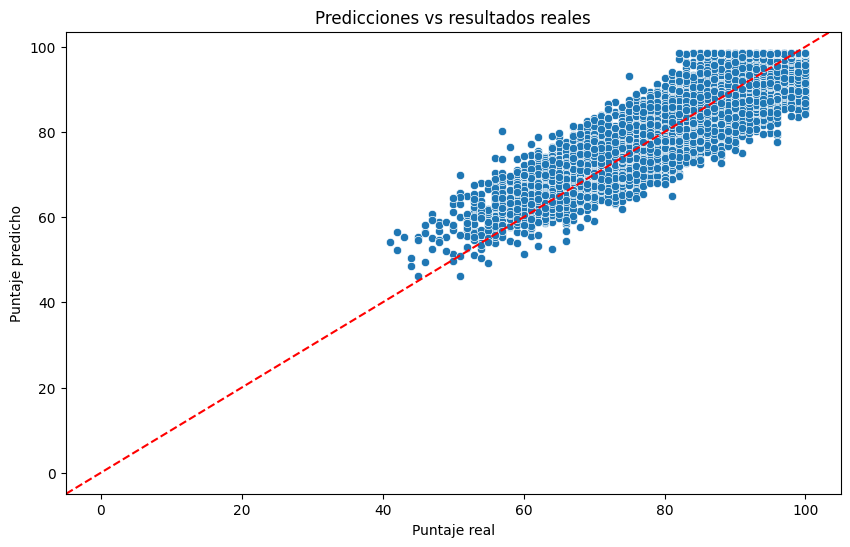

In [36]:
# visualizar resultados
import matplotlib.pyplot as plt
import seaborn as sns

# crear graficos de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Puntaje real')
plt.ylabel('Puntaje predicho')
plt.title('Predicciones vs resultados reales')
plt.axline((0,0), slope=1, color='red', linestyle='--') # linea ideal
plt.show()